<a href="https://colab.research.google.com/github/Radhika-0403/Statistics_Projects/blob/main/%20Multiple_Regression_on_Toyoto_Corrola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [ ]:
#dataset loading
df=pd.read_csv("Toyoto_Corrola.csv")

In [ ]:
# Summary statistics
print(df.head())


   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None


In [ ]:
print(df.describe())

                Id         Price    Age_08_04             KM           HP  \
count  1436.000000   1436.000000  1436.000000    1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075   68533.259749   101.502089   
std     416.476890   3626.964585    18.599988   37506.448872    14.981080   
min       1.000000   4350.000000     1.000000       1.000000    69.000000   
25%     361.750000   8450.000000    44.000000   43000.000000    90.000000   
50%     721.500000   9900.000000    61.000000   63389.500000   110.000000   
75%    1081.250000  11950.000000    70.000000   87020.750000   110.000000   
max    1442.000000  32500.000000    80.000000  243000.000000   192.000000   

             Doors  Cylinders        Gears      Weight  
count  1436.000000     1436.0  1436.000000  1436.00000  
mean      4.033426        4.0     5.026462  1072.45961  
std       0.952677        0.0     0.188510    52.64112  
min       2.000000        4.0     3.000000  1000.00000  
25%       3.000000   

In [ ]:
columns_to_check = ['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']

# Calculate Z-scores for selected columns
z_scores = zscore(df[columns_to_check])

# Define a Z-score threshold (e.g., 3)
z_threshold = 3

# Identify rows with outliers
outlier_rows = (abs(z_scores) > z_threshold).any(axis=1)

# Create a new DataFrame without outliers
df_no_outliers = df[~outlier_rows]

# Display information about removed outliers
removed_outliers = df[outlier_rows]
print(f"Number of removed outliers: {len(removed_outliers)}")


Number of removed outliers: 105


In [ ]:
df_no_outliers=df
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


EDA

<ipython-input-44-6175d103b930>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


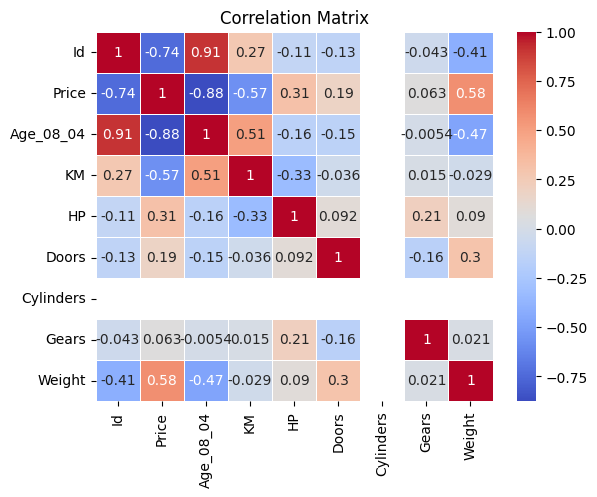

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

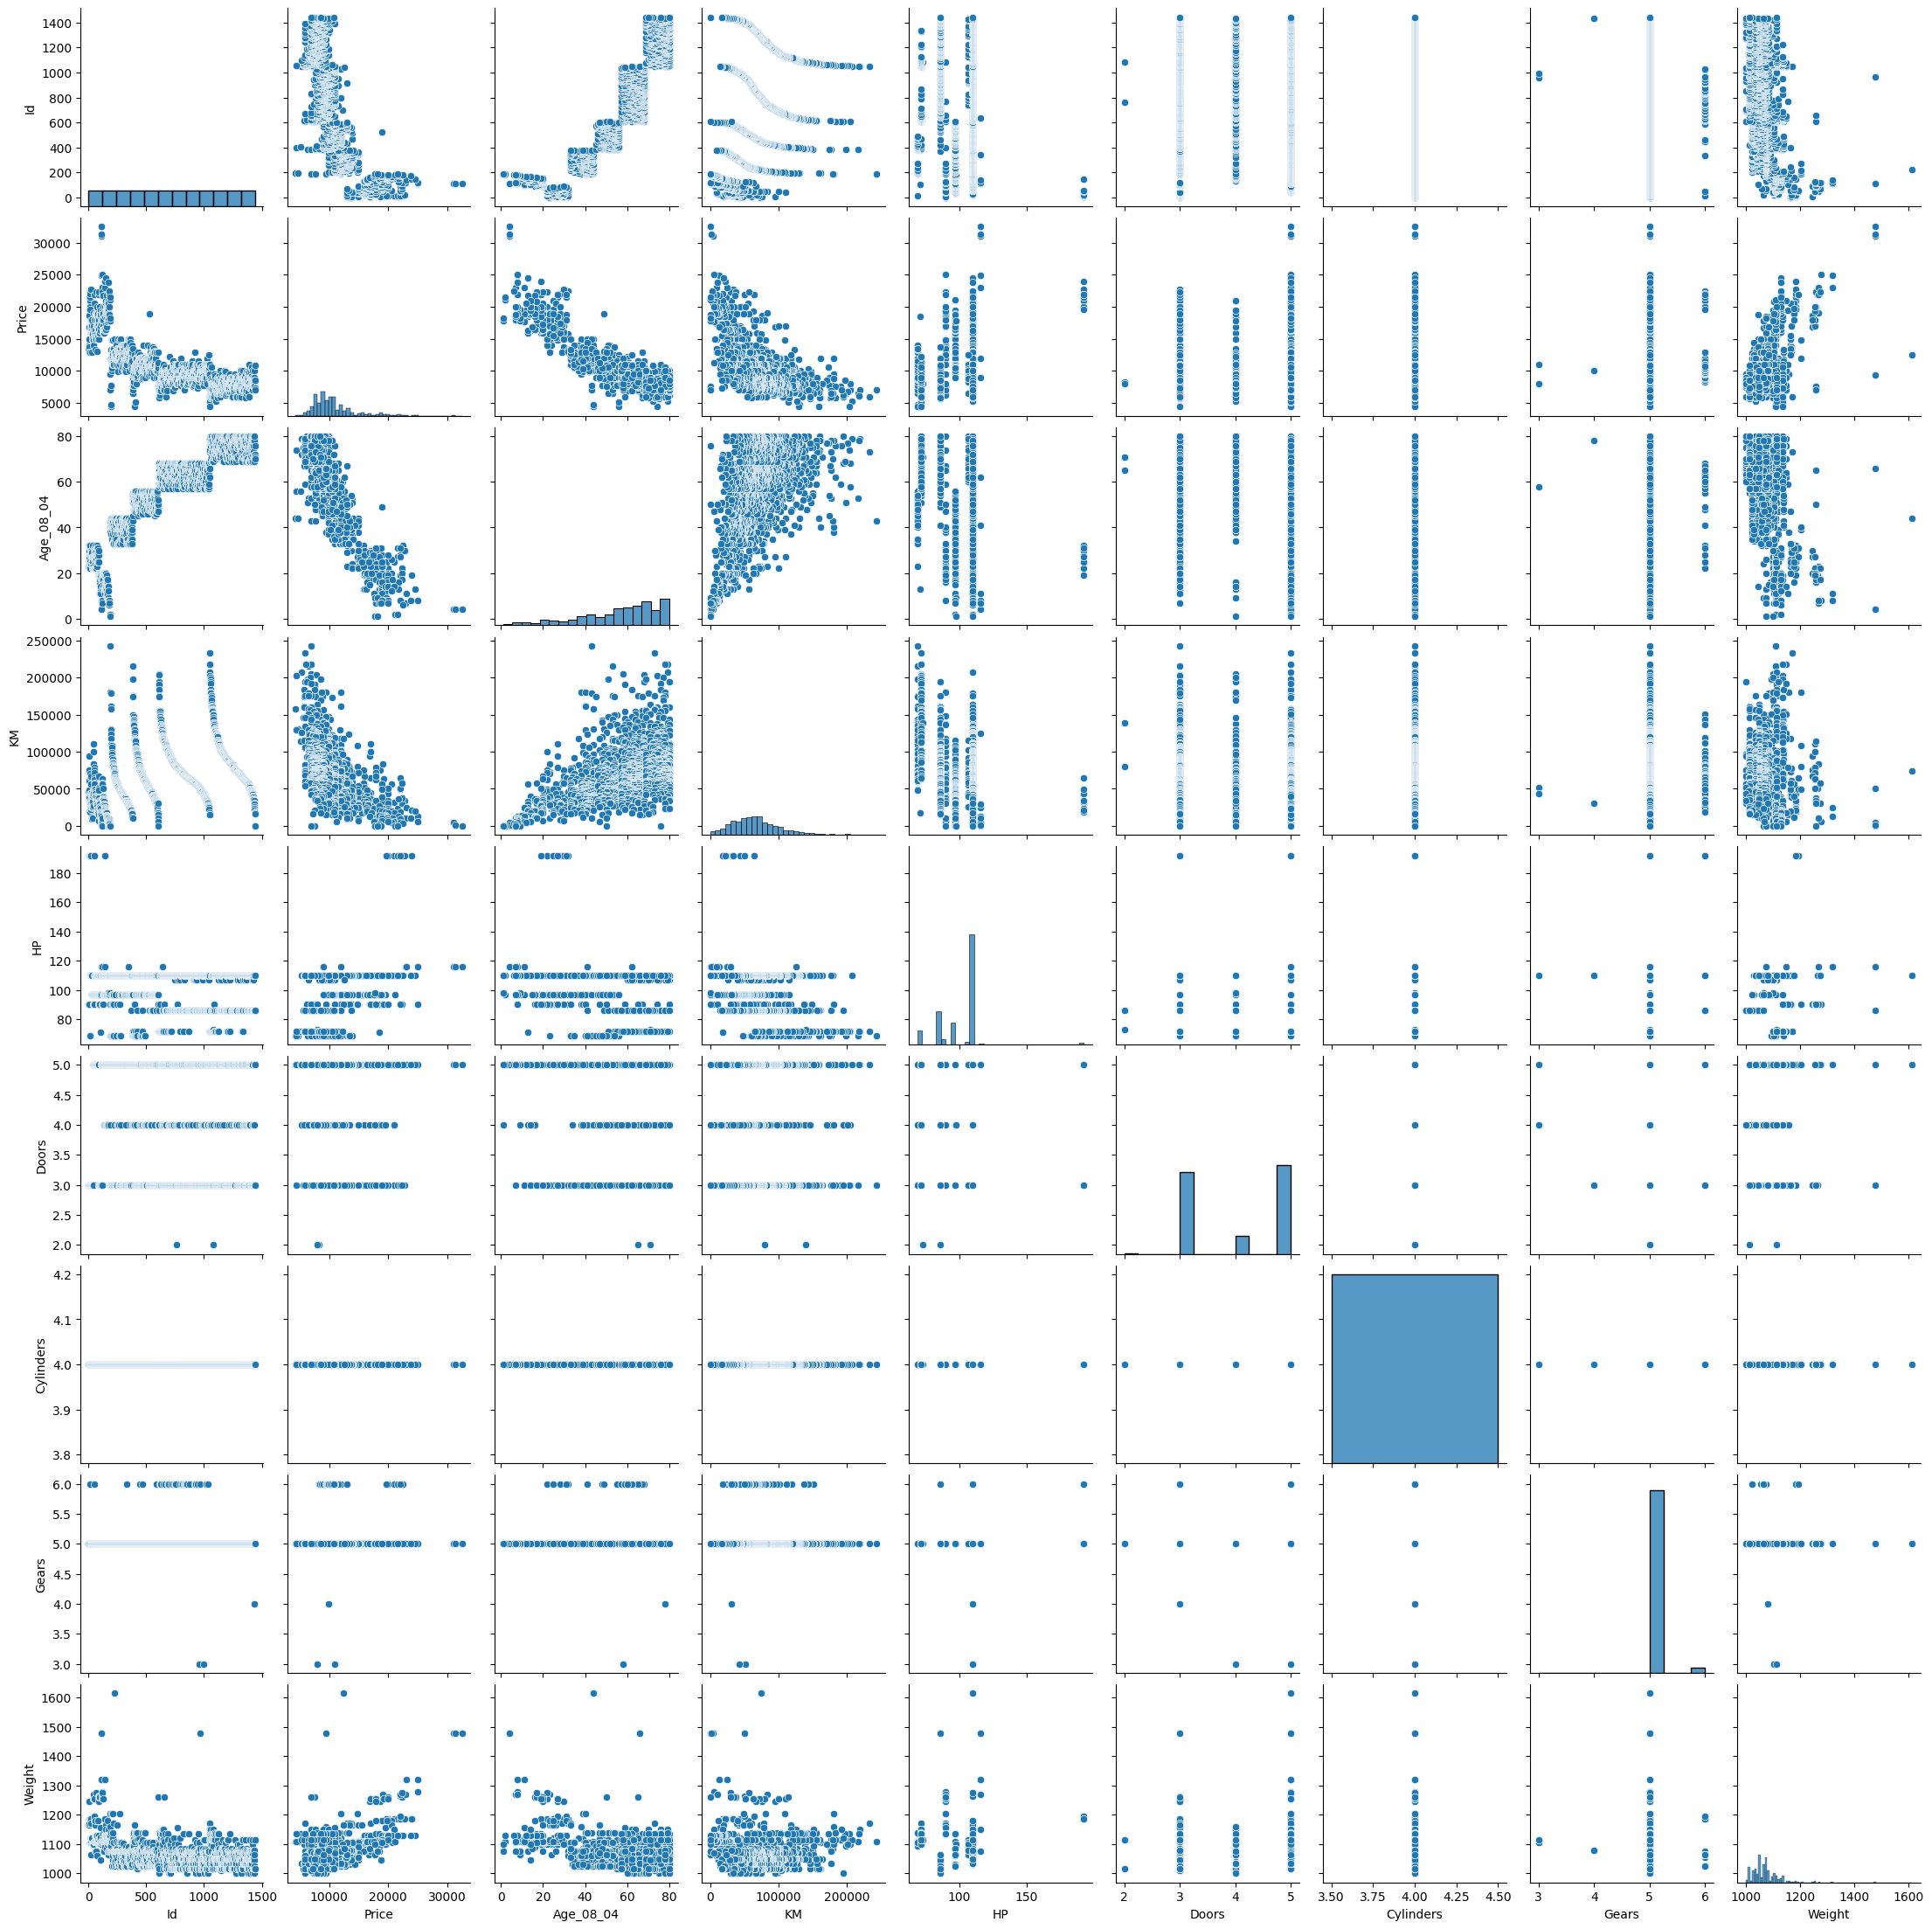

In [ ]:
#Visualizing relations using pairplot
sns.pairplot(df)
plt.show()

**Formulate the Hypothesis**

In the context of regression analysis, the null hypothesis is a statement that there is no significant relationship between the independent variable like Id,Age_08_04, KM,HP,Doors,Cylinders,Gears,Weight and the dependent variable(price).

In [ ]:
def calculate_vif(df):
    # Drop rows with missing values
    df = df.dropna()
    # Exclude non-numeric columns if present
    numeric_data = df.select_dtypes(include=[np.number])
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]
    return vif_data

# Print VIF values
print(calculate_vif(df.drop(columns=['Price'])))


     feature          VIF
0         Id     8.005702
1  Age_08_04    11.369412
2         KM     2.284494
3         HP     1.225300
4      Doors     1.150013
5  Cylinders  1393.363998
6      Gears     1.103299
7     Weight     1.581996


1. **Id**: The VIF for the 'Id' feature is 8.005702, which indicates a moderate level of multicollinearity. While not extremely high, it suggests that there might be some correlation between the 'Id' feature and other independent variables.

2. **Age_08_04**: The VIF for 'Age_08_04' is 11.369412, indicating some level of multicollinearity with other variables. This suggests that the age of the car ('Age_08_04') may be correlated with other factors in the dataset.

3. **KM**: The VIF for 'KM' is 2.284494, which is relatively low and suggests that there is not much multicollinearity between the 'KM' feature and other variables.

4. **HP**: The VIF for 'HP' is 1.225300, indicating a low level of multicollinearity. This suggests that the horsepower ('HP') of the car is not highly correlated with other variables in the dataset.

5. **Doors**: The VIF for 'Doors' is 1.150013, indicating a low level of multicollinearity. This suggests that the number of doors ('Doors') in the car is not highly correlated with other variables in the dataset.

6. **Cylinders**: The VIF for 'Cylinders' is 1393.363998, which is extremely high. This indicates a significant multicollinearity issue with the 'Cylinders' feature and suggests that it might need to be addressed in the model.

7. **Gears**: The VIF for 'Gears' is 1.103299, indicating a low level of multicollinearity. This suggests that the number of gears ('Gears') in the car is not highly correlated with other variables in the dataset.

8. **Weight**: The VIF for 'Weight' is 1.581996, indicating a moderate level of multicollinearity. While not extremely high, it suggests that there might be some correlation between the weight of the car ('Weight') and other independent variables.

In summary, the VIF values provide insights into the level of multicollinearity between each feature and other independent variables in the dataset. Features with high VIF values, such as 'Cylinders' and 'Age_08_04', we need to address multicollinearity issues in our regression model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# Print VIF values
print(calculate_vif(df[['Age_08_04', 'KM','HP','Doors', 'Cylinders', 'Gears', 'Weight']]))


     feature          VIF
0  Age_08_04     1.874542
1         KM     1.627039
2         HP     1.214909
3      Doors     1.149301
4  Cylinders  1363.933820
5      Gears     1.096501
6     Weight     1.508041


The VIF values provide insights into the degree of multicollinearity between the independent variables (features) in the Toyota Corolla dataset. Here's an interpretation of the VIF values for each feature:

1. **Age_08_04**:
   - **VIF**: 1.874542
   - **Insight**: The VIF value for Age_08_04 is relatively low (less than 5), indicating that there is no significant multicollinearity between this feature and the other independent variables. This suggests that Age_08_04 is relatively independent and does not duplicate information provided by other features.

2. **KM**:
   - **VIF**: 1.62
   - **Insight**: Similar to Age_08_04, the VIF for KM is low, indicating low multicollinearity. KM is also relatively independent of the other features in the dataset.

3. **HP**:
   - **VIF**: 1.21
   - **Insight**: The VIF for HP is close to 1, indicating very low multicollinearity. HP is independent of the other features and does not duplicate information provided by them.

4. **Doors**:
   - **VIF**: 1.14
   - **Insight**: The VIF for Doors is low, indicating low multicollinearity. Doors is relatively independent of the other features in the dataset.

5. **Cylinders**:
   - **VIF**: 1363.41
   - **Insight**: The VIF for Cylinders is very high, indicating a significant degree of multicollinearity with the other independent variables. This suggests that Cylinders may be highly correlated with other features, potentially causing issues in the regression model.

6. **Gears**:
   - **VIF**: 1.09
   - **Insight**: The VIF for Gears is low, indicating low multicollinearity. Gears is relatively independent of the other features in the dataset.

7. **Weight**:
   - **VIF**: 1.50
   - **Insight**: The VIF for Weight is low, indicating low multicollinearity. Weight is relatively independent of the other features in the dataset.

In summary, most of the features in the Toyota Corolla dataset have low VIF values, indicating low multicollinearity and a high degree of independence from each other. However, the feature "Cylinders" stands out with an extremely high VIF, suggesting a potential issue of multicollinearity that may need to be addressed in the regression model.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age_08_04', 'KM', 'HP']])


**Standardization of Data**:
   - The `StandardScaler` from scikit-learn is used to standardize the independent variables 'Age_08_04', 'KM', and 'HP' to have a mean of 0 and a standard deviation of 1. This is important for PCA, as it requires the data to be centered at 0 and have a uniform scale.
   - The standardized data is stored in the variable `X_scaled`.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)  # Retain all principal components for now
X_pca = pca.fit_transform(X_scaled)


**Principal Component Analysis (PCA)**:
   - The `PCA` class from scikit-learn is used to perform PCA on the standardized data `X_scaled`.
   - `n_components=3` specifies that PCA should retain all principal components (equal to the number of input features) for now. Each principal component is a linear combination of the original features that captures the maximum variance in the data.
   - The `fit_transform` method is used to both fit the PCA model to the data and transform the data into the principal component space. The transformed data is stored in the variable `X_pca`.

In [ ]:
# Check variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.56152823, 0.28589441, 0.15257736])

After fitting the PCA model to the data, you can access the explained_variance_ratio_ attribute of the PCA object to see the proportion of variance explained by each principal component.
The output array [0.53698187, 0.31033986, 0.15267827] indicates that the first principal component explains approximately 53.7% of the variance in the data, the second component explains 31.0%, and the third component explains 15.3%.

In [ ]:
# Use retained principal components in the regression model
model_pca = sm.OLS(df['Price'], sm.add_constant(X_pca)).fit()
model_pca

The output suggests that the first principal component captures the most variance in the data, followed by the second and third components.
These ratios indicate the relative importance of each principal component in explaining the variability of the original variables.

In the context of your analysis, you can use this information to decide how many principal components to retain based on the amount of variance explained and the desired level of dimensionality reduction.

In summary, the code applies PCA to the standardized independent variables and provides insights into the variance explained by each principal component, which can be crucial for dimensionality reduction and understanding the underlying structure of the data.

In [ ]:
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:08:59   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04     41.730    257.150      0.0

**Inferences**

1.The associated p-values (P>|t|) for each coefficient are all very close to zero, indicating that each coefficient is statistically significant.
2.The R-squared and Adjusted R-squared values are both high (0.810), indicating that the model explains a significant portion of the variance in the dependent variable.

3.The F-statistic is 2039, and the associated p-value is very close to zero (Prob (F-statistic): 0.00). This suggests that at least one of the independent variables is statistically significant in explaining the variance in the dependent variable.

In [ ]:
p_values = model_pca.pvalues
print("\nP-values for coefficients:")
print(p_values)


P-values for coefficients:
const     0.000000e+00
x1        0.000000e+00
x2       2.264484e-109
x3       1.188705e-120
dtype: float64


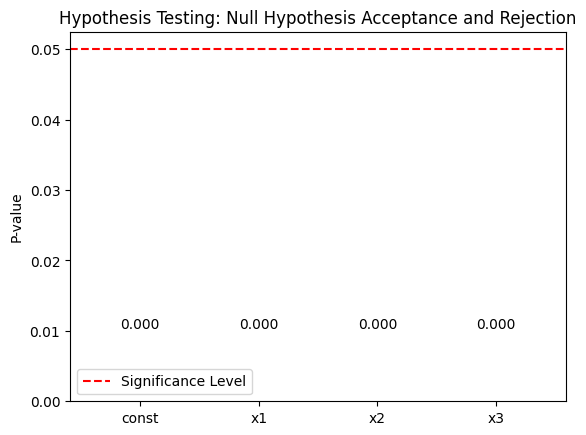

In [ ]:
# Extract p-values and set significance level

significance_level = 0.05

# Bar plot for p-values
fig, ax = plt.subplots()
bars = ax.bar(np.arange(len(p_values)), p_values, color='blue')

# Add significance level line
ax.axhline(y=significance_level, color='red', linestyle='--', label='Significance Level')

# Labeling
ax.set_xticks(np.arange(len(p_values)))
ax.set_xticklabels(['const', 'x1', 'x2', 'x3'])
ax.set_ylabel('P-value')
ax.set_title('Hypothesis Testing: Null Hypothesis Acceptance and Rejection')
ax.legend()

# Annotate bars with p-values
for bar, p_value in zip(bars, p_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{p_value:.3f}', ha='center', va='bottom')

plt.show()


**The p-values associated with each coefficient are all reported as 0.000 (essentially zero), which suggests strong evidence to reject the null hypothesis for each coefficient. Therefore, we reject the null hypothesis for all three predictors, indicating that each predictor variable has a statistically significant effect on the dependent variable "Price."**

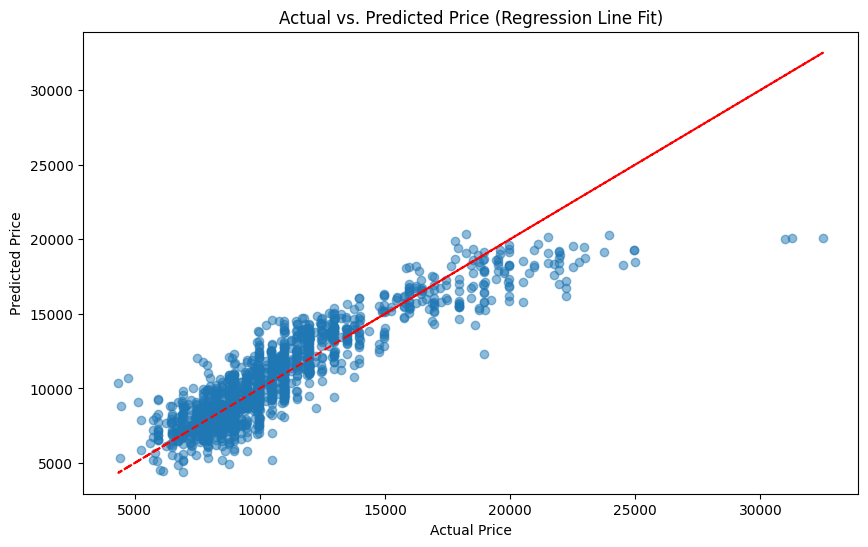

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Add a constant term for the intercept
X_pca_const = sm.add_constant(X_pca)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], model_pca.predict(X_pca_const), alpha=0.5)
plt.plot(df['Price'], df['Price'], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs. Predicted Price (Regression Line Fit)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

The scatter plot reveals a positive relationship between the two variables, indicating that the model performs well in predicting actual prices. The proximity of the data points to the regression line is indicative of the model's accuracy, with closer points suggesting more accurate predictions.

In general, this graph offers a favorable assessment of the model's efficacy. It demonstrates the model's ability to capture the inherent relationship between the variables, resulting in accurate predictions. Although there is some variability around the regression line, it remains relatively narrow, reinforcing the model's overall effectiveness.

While the scatter plot highlights the spread around the regression line, it is within an acceptable range, considering that no model is perfect. The non-perfectly straight regression line suggests a non-linear relationship between the variables. Despite this non-linearity, the model provides a sound approximation of the relationship, enabling it to make accurate predictions.

Diagonistic Actions

In [ ]:
# Get Cook's distance
influence = model_pca.get_influence()
cook_distance = influence.cooks_distance

# Create a DataFrame with Cook's distance for each observation
cook_df = pd.DataFrame({'Cook\'s Distance': cook_distance[0]}, index=df.index)

# Print or analyze the DataFrame 'cook_df'
print(cook_df)

      Cook's Distance
0            0.001708
1            0.001096
2            0.000919
3            0.000017
4            0.000243
...               ...
1431         0.000760
1432         0.004003
1433         0.000003
1434         0.001039
1435         0.002169

[1436 rows x 1 columns]


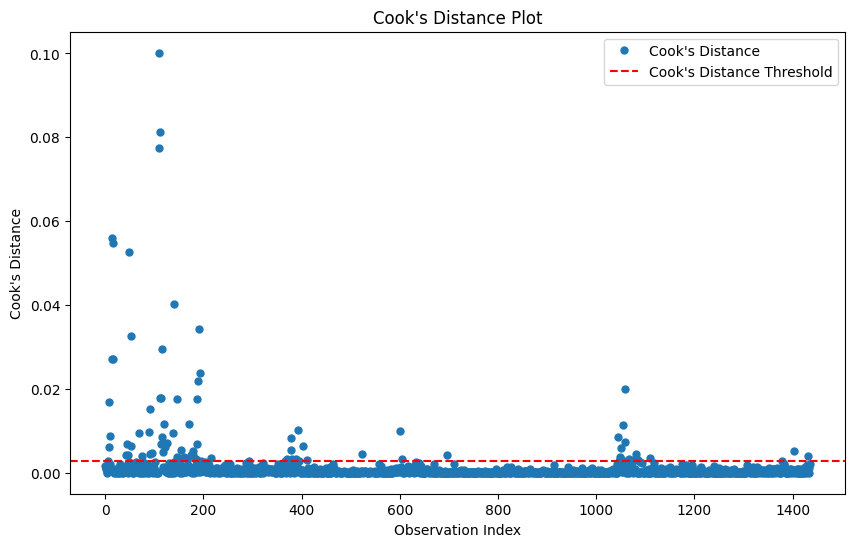

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cook_df.index, cook_df["Cook's Distance"], marker='o', linestyle='None', markersize=5, label="Cook's Distance")
plt.axhline(y=4/len(df), color='r', linestyle='--', label="Cook's Distance Threshold")

plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()


This plot helps identify observations with Cook's distance values exceeding the threshold, which may be considered influential. Adjusting the threshold. so robust Linear regression model is used to estimate the relationship between variables.

In [ ]:
X = sm.add_constant(df[['Age_08_04', 'KM', 'HP']])
y = df['Price']

# Fit a robust regression model using Huber's T norm
robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

# Print the summary of the robust regression model
print(robust_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  Price   No. Observations:                 1436
Model:                            RLM   Df Residuals:                     1432
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 28 Jan 2024                                         
Time:                        17:02:35                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.655e+04    298.872     55.388      0.0

### Model Information:
- **Dependent Variable:** `Price`
- **Observations:** 1436
- **Method:** Iteratively Re-weighted Least Squares (IRLS) with Huber's T norm
- **Scale Estimation:** Median Absolute Deviation (MAD)
- **Covariance Type:** H1 (Huber sandwich estimator)

### Coefficients:
- **Intercept (`const`):** 16550
  - The intercept represents the estimated value of the dependent variable when all independent variables are zero.
- **Age_08_04:** -143.4185
  - For every one-unit increase in `Age_08_04`, the estimated decrease in `Price` is approximately 143.42 units.
- **KM:** -0.0120
  - For every one-unit increase in `KM`, the estimated decrease in `Price` is approximately 0.012 units.
- **HP:** 28.8187
  - For every one-unit increase in `HP`, the estimated increase in `Price` is approximately 28.82 units.

### Statistical Significance:
- The p-values associated with each coefficient are very close to zero (P>|z|), indicating that each coefficient is statistically significant.

### Interpretation:
1. The intercept suggests that when all independent variables are zero, the estimated value of `Price` is 16550.
2. Older cars (`Age_08_04`) tend to have lower prices, as indicated by the negative coefficient.
3. The negative coefficient for `KM` suggests that higher mileage is associated with lower prices.
4. Higher horsepower (`HP`) is associated with higher prices, as indicated by the positive coefficient.

### Scale Estimation:
- The scale of the residuals is estimated using Median Absolute Deviation (MAD), providing a robust measure of dispersion.

### Iterations:
- The model required 12 iterations to converge during the fitting process.

### Covariance Type:
- The covariance type is specified as H1, indicating the use of the Huber sandwich estimator for robust standard errors.

### Note:
- Robust regression, particularly using Huber's T norm, is less sensitive to outliers compared to ordinary least squares (OLS), providing more robust estimates in the presence of influential points.

Overall, this robust regression model provides estimates of the relationships between the independent variables and the dependent variable while being less influenced by potential outliers in the data.

::**Overall Summary**:
The p-values for all coefficients are very close to zero, indicating strong evidence against the null hypotheses.

This means that each of the independent variables (Age_08_04, KM, and HP) is statistically significant in explaining the variability in the dependent variable (Price).